In [6]:
# подгружаем все нужные пакеты
import pandas as pd
import numpy as np


# для встроенных картинок
%pylab inline
# чуть покрасивше картинки:
pd.set_option('display.mpl_style', 'default')
figsize(12, 9)

import warnings
warnings.filterwarnings("ignore")

#plt.rcParams['figure.figsize'] = 10, 7.5
#plt.rcParams['axes.grid'] = True
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['font.family'] = 'Ubuntu'

Populating the interactive namespace from numpy and matplotlib


## Загружаем данные и смотрим признаки

In [7]:
# загрузка
train_d = pd.read_csv('Train_pjb2QcD.csv')
test_d = pd.read_csv('Test_wyCirpO.csv')

In [8]:
# признаки
for name in train_d.columns:
    print (name, train_d[name].nunique())

ID 9527
Office_PIN 98
Application_Receipt_Date 357
Applicant_City_PIN 2979
Applicant_Gender 2
Applicant_BirthDate 5836
Applicant_Marital_Status 4
Applicant_Occupation 5
Applicant_Qualification 11
Manager_DOJ 646
Manager_Joining_Designation 8
Manager_Current_Designation 5
Manager_Grade 10
Manager_Status 2
Manager_Gender 2
Manager_DoB 1245
Manager_Num_Application 17
Manager_Num_Coded 10
Manager_Business 3747
Manager_Num_Products 57
Manager_Business2 3743
Manager_Num_Products2 57
Business_Sourced 2


In [9]:
# просто ответы одного из алгоритмов
a = pd.read_csv('dj_ens08.csv').values[:,1]
test_d['Business_Sourced'] = 0+(a>0.693) # ответ лучшего алгоритма

In [11]:
train_d[:5]

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
0,FIN1000001,842001,4/16/2007,844120,M,12/19/1971,M,Others,Graduate,11/10/2005,Level 1,Level 2,3,Confirmation,M,2/17/1978,2,1,335249,28,335249,28,0
1,FIN1000002,842001,4/16/2007,844111,M,2/17/1983,S,Others,Class XII,11/10/2005,Level 1,Level 2,3,Confirmation,M,2/17/1978,2,1,335249,28,335249,28,1
2,FIN1000003,800001,4/16/2007,844101,M,1/16/1966,M,Business,Class XII,5/27/2006,Level 1,Level 1,2,Confirmation,M,3/3/1969,0,0,357184,24,357184,24,0
3,FIN1000004,814112,4/16/2007,814112,M,2/3/1988,S,Salaried,Class XII,8/21/2003,Level 1,Level 3,4,Confirmation,F,8/14/1978,0,0,318356,22,318356,22,0
4,FIN1000005,814112,4/16/2007,815351,M,7/4/1985,M,Others,Class XII,5/8/2006,Level 1,Level 1,2,Confirmation,M,2/7/1971,2,1,230402,17,230402,17,0


## Временные признаки

In [13]:
# признаки - время
train_d['Application_Receipt_Date'] = pd.to_datetime(train_d.Application_Receipt_Date)
train_d['Applicant_BirthDate'] = pd.to_datetime(train_d.Applicant_BirthDate)
train_d['Manager_DOJ'] = pd.to_datetime(train_d.Manager_DOJ)
train_d['Manager_DoB'] = pd.to_datetime(train_d.Manager_DoB)

test_d['Application_Receipt_Date'] = pd.to_datetime(test_d.Application_Receipt_Date)
test_d['Applicant_BirthDate'] = pd.to_datetime(test_d.Applicant_BirthDate)
test_d['Manager_DOJ'] = pd.to_datetime(test_d.Manager_DOJ)
test_d['Manager_DoB'] = pd.to_datetime(test_d.Manager_DoB)

In [18]:
# просто пример, что с ними можно сделать...
tmp = test_d.Manager_DOJ.dt
pd.DataFrame({'day': tmp.day[:5],
              'dayofweek': tmp.dayofweek[:5], 
              'dayofyear': tmp.dayofyear[:5], 
              'month': tmp.month[:5]})

,day,dayofweek,dayofyear,month
0,26,0,147,5
1,24,1,176,6
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,4,1,338,12


## Служебный код - перекодирование признаков

In [29]:
# train_d['Manager_Gender'] = train_d['Manager_Gender'].map({'M':1, 'F':-1, nan:0})
# test_d['Manager_Gender'] = test_d['Manager_Gender'].map({'M':1, 'F':-1, nan:0})

# train_d['Applicant_Gender'] = train_d['Applicant_Gender'].map({'M':1, 'F':-1, nan:0})
# test_d['Applicant_Gender'] = test_d['Applicant_Gender'].map({'M':1, 'F':-1, nan:0})


train_d['genders'] = train_d['Manager_Gender'].astype(str) + '+' + train_d['Applicant_Gender'].astype(str)
test_d['genders'] = test_d['Manager_Gender'].astype(str) + '+' + test_d['Applicant_Gender'].astype(str)

# train_d['genders'] = train_d['genders'].map({'11':1, '-11':3, '1-1':4, '-1-1':6, '01':2, '0-1':5, '10':0, '00':0, '-10':0})
# test_d['genders'] = test_d['genders'].map({'11':1, '-11':3, '1-1':4, '-1-1':6, '01':2, '0-1':5, '10':0, '00':0, '-10':0})


## Делаем визуализацию признаков

In [31]:
# ЭТО ПРИЗНАК, КОТОРЫЙ СМОТРИМ
feature = 'Applicant_Qualification' #'Manager_Gender' # 'Applicant_Qualification'# 'Applicant_Marital_Status'# 'Applicant_Occupation'

# два участка 
indclass = train_d['Application_Receipt_Date'] > pd.Timestamp('2008-04-01')
train1 = train_d[~indclass]
train2 = train_d[indclass]

print ('UNIQUE TRAIN 1 = ', train1[feature].unique())
print ('UNIQUE TRAIN 2 = ', train2[feature].unique())
print ('UNIQUE TEST = ', test_d[feature].unique())

t1 = train1[[feature, 'Business_Sourced']].fillna(-1.1).groupby(feature)['Business_Sourced'].agg({'mean':np.mean, 'size':size})
t2 = train2[[feature, 'Business_Sourced']].fillna(-1.1).groupby(feature)['Business_Sourced'].agg({'mean':np.mean, 'size':size})
t3 = test_d[[feature, 'Business_Sourced']].fillna(-1.1).groupby(feature)['Business_Sourced'].agg({'mean':np.mean, 'size':size})

# здесь лежат сколько признак встречается и среднее значение целевого
pd.concat([t1, t2, t3], axis=1, keys=['train-1','train-2','test'])

UNIQUE TRAIN 1 =  ['Graduate' 'Class XII' 'Class X' 'Masters of Business Administration' nan
 'Associate/Fellow of Institute of Company Secretories of India'
 'Associate / Fellow of Institute of Chartered Accountans of India'
 'Others' 'Associate/Fellow of Insurance Institute of India']
UNIQUE TRAIN 2 =  ['Class XII' 'Masters of Business Administration' 'Graduate' 'Others'
 'Class X' 'Associate/Fellow of Acturial Society of India' nan
 'Certified Associateship of Indian Institute of Bankers'
 'Professional Qualification in Marketing']
UNIQUE TEST =  ['Graduate' 'Masters of Business Administration' 'Class XII' 'Others' nan
 'Class X'
 'Associate / Fellow of Institute of Chartered Accountans of India'
 'Professional Qualification in Marketing'
 'Associate/Fellow of Institute of Institute of Costs and Works Accountants of India']


train-1           train-2  \
                                                      size      mean    size   
-1.1                                                    67  0.000000      19   
Associate / Fellow of Institute of Chartered Ac...       3  0.333333     NaN   
Associate/Fellow of Institute of Company Secret...       1  0.000000     NaN   
Associate/Fellow of Insurance Institute of India         1  1.000000     NaN   
Class X                                                221  0.294118       4   
Class XII                                             5318  0.322114     488   
Graduate                                              1829  0.374522    1367   
Masters of Business Administration                      33  0.333333      41   
Others                                                  56  0.535714      76   
Associate/Fellow of Acturial Society of India          NaN       NaN       1   
Certified Associateship of Indian Institute of ...     NaN       NaN       1   
Professional Qualification in Marketing                NaN       NaN       1   
Associate/Fellow of Institute of Institute of C...     NaN       NaN     NaN   

                                                              test            
                                                        mean  size      mean  
-1.1                                                0.000000    44  0.000000  
Associate / Fellow of Institute of Chartered Ac...       NaN     2  1.000000  
Associate/Fellow of Institute of Company Secret...       NaN   NaN       NaN  
Associate/Fellow of Insurance Institute of India         NaN   NaN       NaN  
Class X                                             0.250000    19  0.842105  
Class XII                                           0.409836  1357  0.677966  
Graduate                                            0.373811  3375  0.715852  
Masters of Business Administration                  0.390244    71  0.760563  
Others                                              0.407895   171  0.824561  
Associate/Fellow of Acturial Society of India       0.000000   NaN       NaN  
Certified Associateship of Indian Institute of ...  1.000000   NaN       NaN  
Professional Qualification in Marketing             1.000000     5  0.600000  
Associate/Fellow of Institute of Institute of C...       NaN     1  0.000000

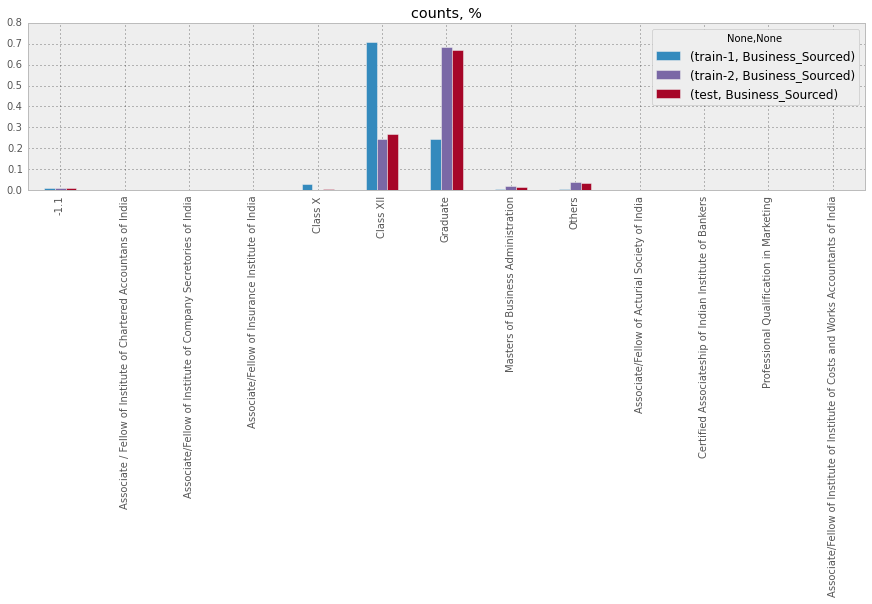

In [22]:
# АНАЛОГИЧНО - на картинке

# рисунок частот
df = pd.concat([train1[[feature, 'Business_Sourced']].fillna(-1.1).groupby(feature).count(),
           train2[[feature, 'Business_Sourced']].fillna(-1.1).groupby(feature).count(),
           test_d[[feature, 'Business_Sourced']].fillna(-1.1).groupby(feature).count()],
          keys=['train-1','train-2','test'], axis=1)
df = df/df.sum()
df.plot(kind = 'bar', figsize=(15,3), title='counts, %')


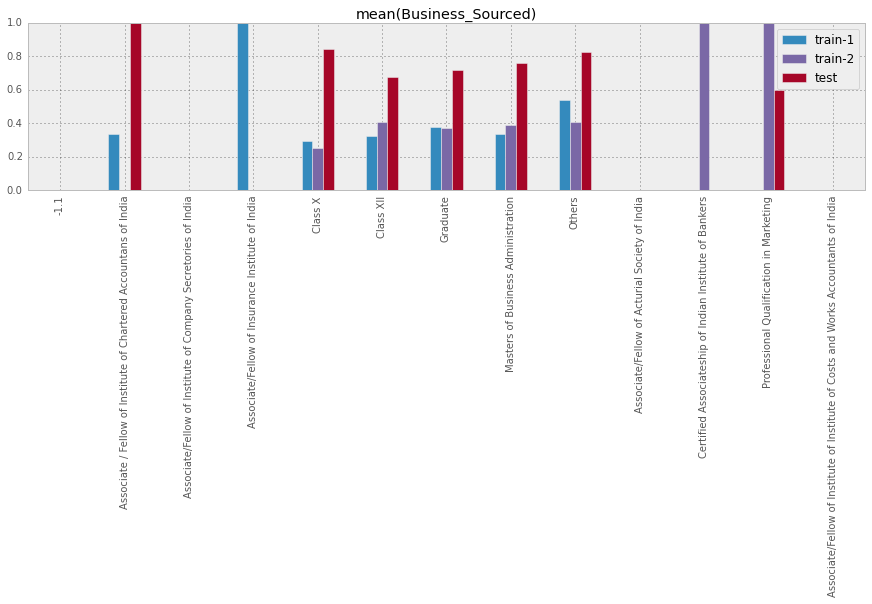

In [24]:
# рисунок средних целевых
df = pd.concat([train1[[feature, 'Business_Sourced']].fillna(-1.1).groupby(feature)['Business_Sourced'].mean(),
           train2[[feature, 'Business_Sourced']].fillna(-1.1).groupby(feature)['Business_Sourced'].mean(),
           test_d[[feature, 'Business_Sourced']].fillna(-1.1).groupby(feature)['Business_Sourced'].mean()],
          keys=['train-1','train-2','test'], axis=1)
#df = df/df.sum()
df.plot(kind = 'bar', figsize=(15,3), title='mean(Business_Sourced)')

## Изменение признаков во времени

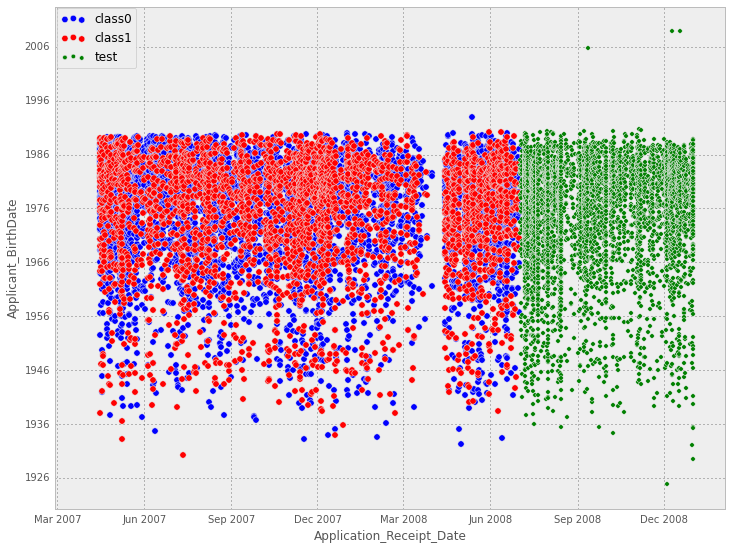

In [25]:
# тут не-даты NaT
ind = ~train_d['Applicant_BirthDate'].isnull()
#+ np.random.randn(train_d.shape[0]) * 0.1

# plt.scatter(train_d[ind]['Application_Receipt_Date'].values, train_d[ind]['Applicant_BirthDate'].values , 40, c = train_d.Business_Sourced[ind].values, label=['class0', 'class1'])

# выводим каждый класс - своим цветоим
indclass = train_d.Business_Sourced.values > 0
plt.scatter(train_d[ind&~indclass]['Application_Receipt_Date'].values, train_d[ind&~indclass]['Applicant_BirthDate'].values , 40, c = 'blue', label='class0')
plt.scatter(train_d[ind&indclass]['Application_Receipt_Date'].values, train_d[ind&indclass]['Applicant_BirthDate'].values , 40, c = 'red', label='class1')

# тест
# тут не-даты NaT
ind2= ~test_d['Applicant_BirthDate'].isnull()
plt.scatter(test_d[ind2]['Application_Receipt_Date'].values, test_d[ind2]['Applicant_BirthDate'].values , 20, c='green', label='test')

# подготовка рисунка
plt.xlabel('Application_Receipt_Date')
plt.ylabel('Applicant_BirthDate')
plt.legend(bbox_to_anchor=(0., 1), loc=2, borderaxespad=0.1)


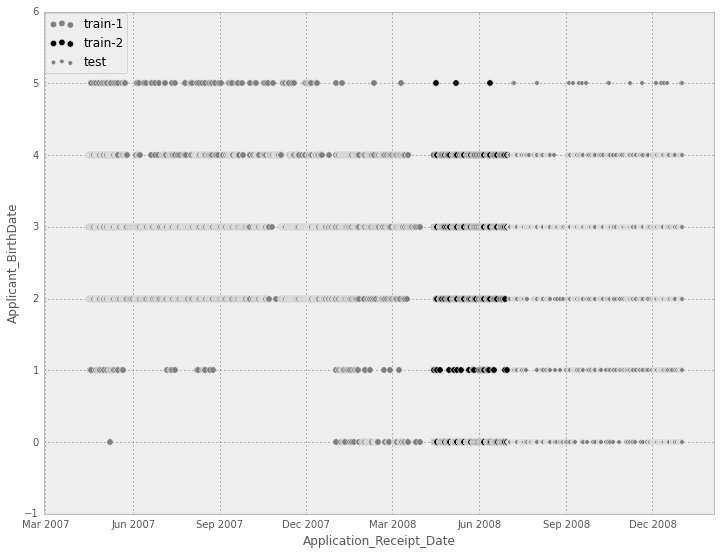

In [130]:
# тут не-даты NaT
ind = ~train_d['Applicant_BirthDate'].isnull()
#+ np.random.randn(train_d.shape[0]) * 0.1

# plt.scatter(train_d[ind]['Application_Receipt_Date'].values, train_d[ind]['Applicant_BirthDate'].values , 40, c = train_d.Business_Sourced[ind].values, label=['class0', 'class1'])

# выводим каждый класс - своим цветоим
#indclass = train_d.Business_Sourced.values > 0
indclass = train_d['Application_Receipt_Date'] > pd.Timestamp('2008-04-01')
plt.scatter(train_d[ind&~indclass]['Application_Receipt_Date'].values, train_d[ind&~indclass]['Applicant_BirthDate'].values , 40, c = 'grey', label='train-1')
plt.scatter(train_d[ind&indclass]['Application_Receipt_Date'].values, train_d[ind&indclass]['Applicant_BirthDate'].values , 40, c = 'black', label='train-2')

# тест
# тут не-даты NaT
ind2= ~test_d['Applicant_BirthDate'].isnull()
plt.scatter(test_d[ind2]['Application_Receipt_Date'].values, test_d[ind2]['Applicant_BirthDate'].values , 20, c='grey', label='test')

# подготовка рисунка
plt.xlabel('Application_Receipt_Date')
plt.ylabel('Applicant_BirthDate')
plt.legend(bbox_to_anchor=(0., 1), loc=2, borderaxespad=0.1)


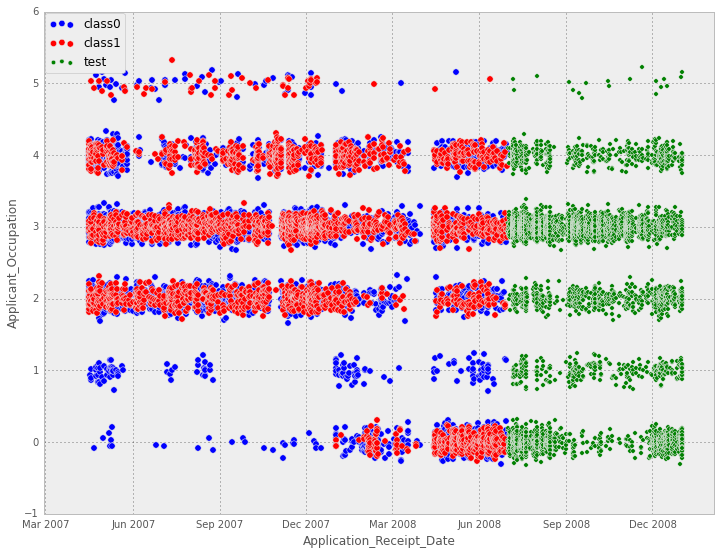

In [26]:
train_d['Applicant_Occupation'] = train_d['Applicant_Occupation'].map({nan:0, 'Self Employed':1, 'Business':2, 'Salaried':3, 'Others':4, 'Student':5})
test_d['Applicant_Occupation'] = test_d['Applicant_Occupation'].map({nan:0, 'Self Employed':1, 'Business':2, 'Salaried':3, 'Others':4, 'Student':5})

train_d['Applicant_Occupation'] = train_d['Applicant_Occupation'] + np.random.randn(train_d.shape[0]) * 0.1
test_d['Applicant_Occupation'] = test_d['Applicant_Occupation'] + np.random.randn(test_d.shape[0]) * 0.1

# тут не-даты NaT
ind = train_d.Business_Sourced.values > -1 # train_d['Applicant_BirthDate'].isnull()


# plt.scatter(train_d[ind]['Application_Receipt_Date'].values, train_d[ind]['Applicant_BirthDate'].values , 40, c = train_d.Business_Sourced[ind].values, label=['class0', 'class1'])

# выводим каждый класс - своим цветоим
indclass = train_d.Business_Sourced.values > 0
plt.scatter(train_d[ind&~indclass]['Application_Receipt_Date'].values, train_d[ind&~indclass]['Applicant_Occupation'].values , 40, c = 'blue', label='class0')
plt.scatter(train_d[ind&indclass]['Application_Receipt_Date'].values, train_d[ind&indclass]['Applicant_Occupation'].values , 40, c = 'red', label='class1')

# тест
# тут не-даты NaT
ind2= test_d.Business_Sourced.values > -1 # ~test_d['Applicant_BirthDate'].isnull()
plt.scatter(test_d[ind2]['Application_Receipt_Date'].values, test_d[ind2]['Applicant_Occupation'].values , 20, c='green', label='test')

# подготовка рисунка
plt.xlabel('Application_Receipt_Date')
plt.ylabel('Applicant_Occupation')
plt.legend(bbox_to_anchor=(0., 1), loc=2, borderaxespad=0.1)

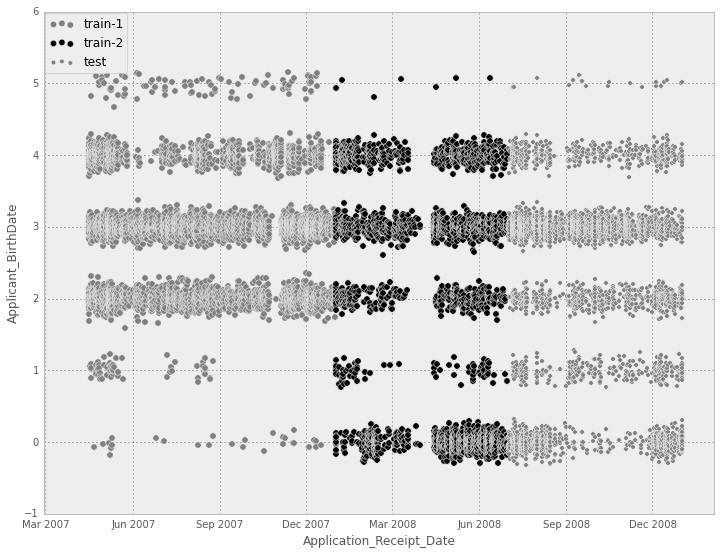

In [148]:
# тут не-даты NaT
ind = train_d.Business_Sourced.values > -1 
#+ np.random.randn(train_d.shape[0]) * 0.1

# plt.scatter(train_d[ind]['Application_Receipt_Date'].values, train_d[ind]['Applicant_BirthDate'].values , 40, c = train_d.Business_Sourced[ind].values, label=['class0', 'class1'])

# выводим каждый класс - своим цветоим
#indclass = train_d.Business_Sourced.values > 0
indclass = train_d['Application_Receipt_Date'] > pd.Timestamp('2008-01-01')
plt.scatter(train_d[ind&~indclass]['Application_Receipt_Date'].values, train_d[ind&~indclass]['Applicant_Occupation'].values , 40, c = 'grey', label='train-1')
plt.scatter(train_d[ind&indclass]['Application_Receipt_Date'].values, train_d[ind&indclass]['Applicant_Occupation'].values , 40, c = 'black', label='train-2')

# тест
# тут не-даты NaT
ind2= ~test_d['Applicant_BirthDate'].isnull()
plt.scatter(test_d[ind2]['Application_Receipt_Date'].values, test_d[ind2]['Applicant_Occupation'].values , 20, c='grey', label='test')

# подготовка рисунка
plt.xlabel('Application_Receipt_Date')
plt.ylabel('Applicant_BirthDate')
plt.legend(bbox_to_anchor=(0., 1), loc=2, borderaxespad=0.1)

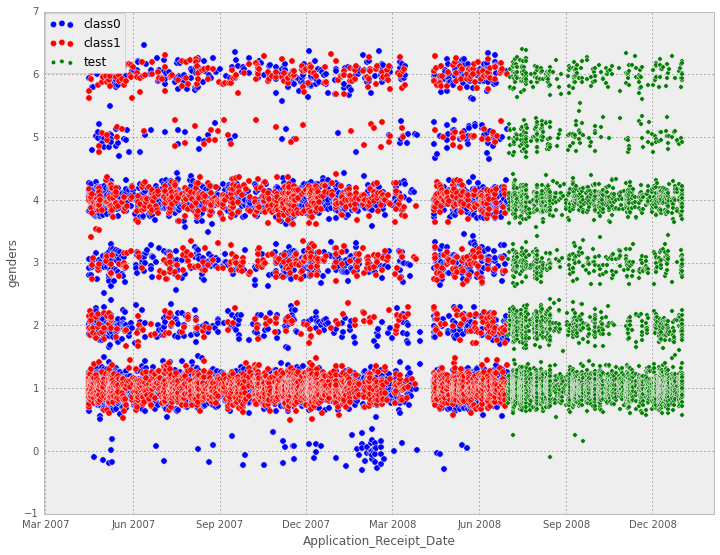

In [178]:
#train_d['Applicant_Occupation'] = train_d['Applicant_Occupation'].map({nan:0, 'Self Employed':1, 'Business':2, 'Salaried':3, 'Others':4, 'Student':5})
#test_d['Applicant_Occupation'] = test_d['Applicant_Occupation'].map({nan:0, 'Self Employed':1, 'Business':2, 'Salaried':3, 'Others':4, 'Student':5})

train_d['genders'] = train_d['genders'] + np.random.randn(train_d.shape[0]) * 0.1
test_d['genders'] = test_d['genders'] + np.random.randn(test_d.shape[0]) * 0.1

# тут не-даты NaT
ind = train_d.Business_Sourced.values > -1 # train_d['Applicant_BirthDate'].isnull()


# plt.scatter(train_d[ind]['Application_Receipt_Date'].values, train_d[ind]['Applicant_BirthDate'].values , 40, c = train_d.Business_Sourced[ind].values, label=['class0', 'class1'])

# выводим каждый класс - своим цветоим
indclass = train_d.Business_Sourced.values > 0
plt.scatter(train_d[ind&~indclass]['Application_Receipt_Date'].values, train_d[ind&~indclass]['genders'].values , 40, c = 'blue', label='class0')
plt.scatter(train_d[ind&indclass]['Application_Receipt_Date'].values, train_d[ind&indclass]['genders'].values , 40, c = 'red', label='class1')

# тест
# тут не-даты NaT
ind2= ~test_d['Applicant_BirthDate'].isnull()
plt.scatter(test_d[ind2]['Application_Receipt_Date'].values, test_d[ind2]['genders'].values , 20, c='green', label='test')

# подготовка рисунка
plt.xlabel('Application_Receipt_Date')
plt.ylabel('genders')
plt.legend(bbox_to_anchor=(0., 1), loc=2, borderaxespad=0.1)

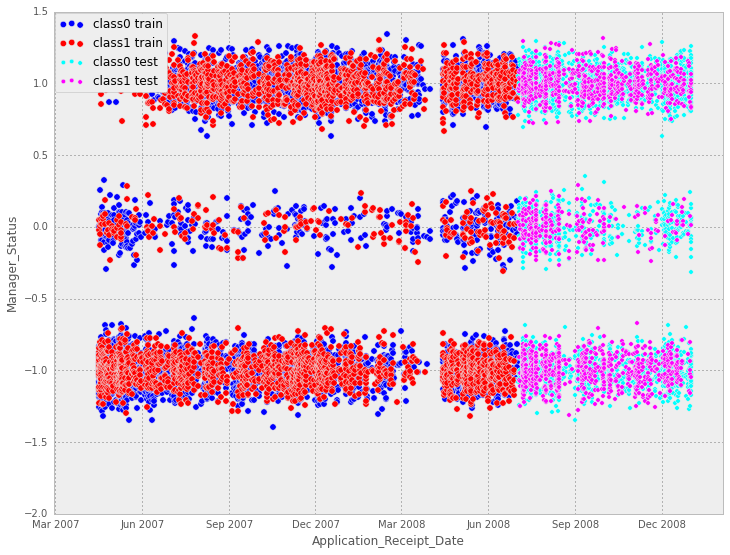

In [73]:
#train_d['Manager_Status'] = train_d['Manager_Status'].map({'Confirmation':-1, nan:0, 'Probation':1})
#test_d['Manager_Status'] = test_d['Manager_Status'].map({'Confirmation':-1, nan:0, 'Probation':1})

#train_d['Manager_Status'] = train_d['Manager_Status'] + np.random.randn(train_d.shape[0]) * 0.1
#test_d['Manager_Status'] = test_d['Manager_Status'] + np.random.randn(test_d.shape[0]) * 0.1

# тут не-даты NaT
ind = train_d.Business_Sourced.values > -1 # train_d['Applicant_BirthDate'].isnull()


# plt.scatter(train_d[ind]['Application_Receipt_Date'].values, train_d[ind]['Applicant_BirthDate'].values , 40, c = train_d.Business_Sourced[ind].values, label=['class0', 'class1'])

# выводим каждый класс - своим цветоим
indclass = train_d.Business_Sourced.values > 0
plt.scatter(train_d[ind&~indclass]['Application_Receipt_Date'].values, train_d[ind&~indclass]['Manager_Status'].values , 40, c = 'blue', label='class0 train')
plt.scatter(train_d[ind&indclass]['Application_Receipt_Date'].values, train_d[ind&indclass]['Manager_Status'].values , 40, c = 'red', label='class1 train')

# тест
# тут не-даты NaT
ind2 = test_d.Business_Sourced.values > -1
indclass2 = test_d.Business_Sourced.values > 0
plt.scatter(test_d[ind2&~indclass2]['Application_Receipt_Date'].values, test_d[ind2&~indclass2]['Manager_Status'].values , 20, c = 'cyan', label='class0 test')
plt.scatter(test_d[ind2&indclass2]['Application_Receipt_Date'].values, test_d[ind2&indclass2]['Manager_Status'].values , 20, c = 'magenta', label='class1 test')

# подготовка рисунка
plt.xlabel('Application_Receipt_Date')
plt.ylabel('Manager_Status')
plt.legend(bbox_to_anchor=(0., 1), loc=2, borderaxespad=0.1)

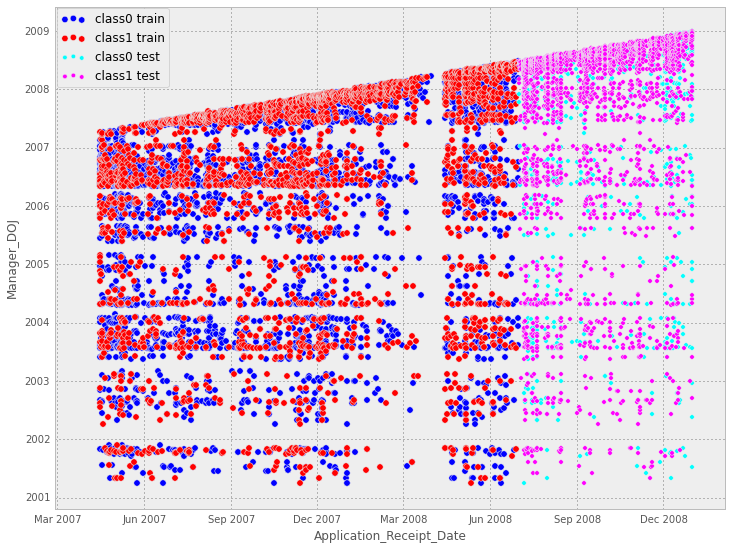

In [32]:


# тут не-даты NaT
ind = ~train_d['Manager_DOJ'].isnull()


# plt.scatter(train_d[ind]['Application_Receipt_Date'].values, train_d[ind]['Applicant_BirthDate'].values , 40, c = train_d.Business_Sourced[ind].values, label=['class0', 'class1'])

# выводим каждый класс - своим цветоим
indclass = train_d.Business_Sourced.values > 0
plt.scatter(train_d[ind&~indclass]['Application_Receipt_Date'].values, train_d[ind&~indclass]['Manager_DOJ'].values , 40, c = 'blue', label='class0 train')
plt.scatter(train_d[ind&indclass]['Application_Receipt_Date'].values, train_d[ind&indclass]['Manager_DOJ'].values , 40, c = 'red', label='class1 train')

# тест
# тут не-даты NaT
ind2 = ~test_d['Manager_DOJ'].isnull()
indclass2 = test_d.Business_Sourced.values > 0
plt.scatter(test_d[ind2&~indclass2]['Application_Receipt_Date'].values, test_d[ind2&~indclass2]['Manager_DOJ'].values , 20, c = 'cyan', label='class0 test')
plt.scatter(test_d[ind2&indclass2]['Application_Receipt_Date'].values, test_d[ind2&indclass2]['Manager_DOJ'].values , 20, c = 'magenta', label='class1 test')

# подготовка рисунка
plt.xlabel('Application_Receipt_Date')
plt.ylabel('Manager_DOJ')
plt.legend(bbox_to_anchor=(0., 1), loc=2, borderaxespad=0.1)

## Утечка

в каждом дне (кр. первого) данные упорядочены по значению целевого признака!

In [40]:
train_d = train_d[:1500]
test_d = test_d[:1500]

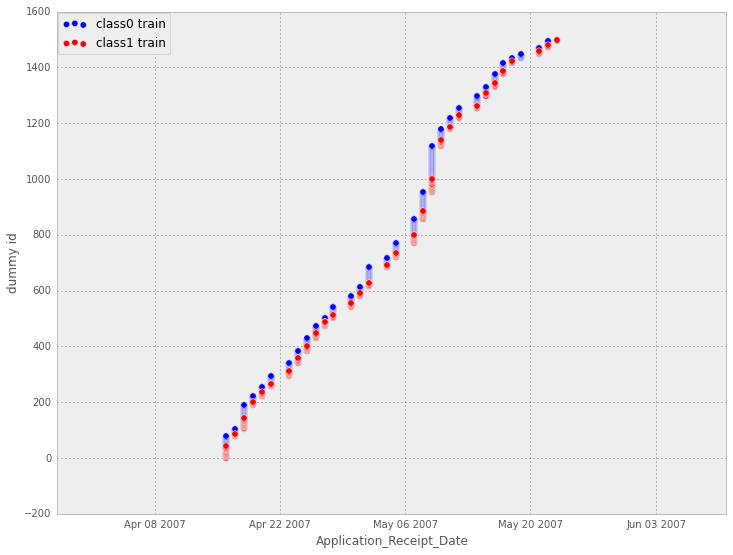

In [41]:
# тут не-даты NaT
ind = ~train_d['Application_Receipt_Date'].isnull()

dummy = np.arange(train_d.shape[0])


# plt.scatter(train_d[ind]['Application_Receipt_Date'].values, train_d[ind]['Applicant_BirthDate'].values , 40, c = train_d.Business_Sourced[ind].values, label=['class0', 'class1'])

# выводим каждый класс - своим цветоим
indclass = train_d.Business_Sourced.values > 0
plt.scatter(train_d[ind&~indclass]['Application_Receipt_Date'].values, dummy[ind.values&~indclass] , 40, c = 'blue', label='class0 train')
plt.scatter(train_d[ind&indclass]['Application_Receipt_Date'].values, dummy[ind.values&indclass] , 40, c = 'red', label='class1 train')

# тест
# тут не-даты NaT
# ind2 = ~test_d['Manager_DOJ'].isnull()
# indclass2 = test_d.Business_Sourced.values > 0
# plt.scatter(test_d[ind2&~indclass2]['Application_Receipt_Date'].values, dummy[ind2.values&~indclass2] , 20, c = 'cyan', label='class0 test')
# plt.scatter(test_d[ind2&indclass2]['Application_Receipt_Date'].values, dummy[ind2.values&indclass2] , 20, c = 'magenta', label='class1 test')

# подготовка рисунка
plt.xlabel('Application_Receipt_Date')
plt.ylabel('dummy id')
plt.legend(bbox_to_anchor=(0., 1), loc=2, borderaxespad=0.1)

In [44]:
train_d[['Application_Receipt_Date','Business_Sourced']][:100]

,Application_Receipt_Date,Business_Sourced
0,2007-04-16,0
1,2007-04-16,1
2,2007-04-16,0
3,2007-04-16,0
4,2007-04-16,0
5,2007-04-16,1
6,2007-04-16,1
7,2007-04-16,0
8,2007-04-16,1
9,2007-04-16,1


In [73]:
train_d['num_of_sale'] = np.arange(train_d.shape[0])
tmp = train_d['Application_Receipt_Date'].map(train_d.groupby('Application_Receipt_Date').num_of_sale.min())
train_d['sales_in_day'] = train_d['Application_Receipt_Date'].map(train_d.groupby('Application_Receipt_Date').num_of_sale.max()) - tmp + 1
train_d['num_of_sale'] = train_d['num_of_sale'] - tmp
train_d['invert_num_of_sale'] = train_d['sales_in_day'] - train_d['num_of_sale'] - 1
train_d['per_of_sale'] = train_d.num_of_sale/train_d['Application_Receipt_Date'].map(train_d.groupby('Application_Receipt_Date').num_of_sale.max())
train_d['per_of_sale'] = train_d['per_of_sale'].fillna(0.0)

In [74]:
train_d[['Application_Receipt_Date','Business_Sourced','num_of_sale', 'sales_in_day', 'invert_num_of_sale', 'per_of_sale']][:100]


,Application_Receipt_Date,Business_Sourced,num_of_sale,sales_in_day,invert_num_of_sale,per_of_sale
0,2007-04-16,0,0,79,78,0.000000
1,2007-04-16,1,1,79,77,0.012821
2,2007-04-16,0,2,79,76,0.025641
3,2007-04-16,0,3,79,75,0.038462
4,2007-04-16,0,4,79,74,0.051282
5,2007-04-16,1,5,79,73,0.064103
6,2007-04-16,1,6,79,72,0.076923
7,2007-04-16,0,7,79,71,0.089744
8,2007-04-16,1,8,79,70,0.102564
9,2007-04-16,1,9,79,69,0.115385
